Solar Power Generation Forecasting

In [2]:
import numpy as np # To perform numerical operations
import pandas as pd # To do data manipulation and analysis
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For advanced Data visualizations
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.model_selection import train_test_split # For splitting dataset into training and testing set
from sklearn.linear_model import LinearRegression # For Model Selection
from sklearn.ensemble import RandomForestRegressor # Model Selection for Random Forest
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # To Evaluate Model's Performance
from datetime import datetime  # To handle time based features 
import joblib # For saving and Loading the Trained Model

In [3]:
#Loading the plant 1 generation and Weather Sensor Data
generation_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')

In [4]:
generation_data.head(5) # viewing the first 5 rows of the Geneation dataset

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [5]:
weather_data.head(5) # viewing the first 5 rows of the Weather Sensor Dataseted

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,15-05-2020 00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,15-05-2020 00:15,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,15-05-2020 00:30,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,15-05-2020 00:45,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,15-05-2020 01:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [6]:
# before merging the datasets we ne to convert date time format for proper time alignement

generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], dayfirst=True) # Parsing the date string in the format of Day/month/year
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])

C:\Users\Shivani\AppData\Local\Temp\ipykernel_12204\3061792517.py:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])


In [7]:
# Aggregating Generation Data
generation_agg = generation_data.groupby('DATE_TIME').agg({
    'DC_POWER':'sum', #calculating the sum of DC_Power
    'AC_POWER':'sum', #calculating the sum of AC_POWER
    'DAILY_YIELD' : 'mean', #calculating the average of DAILY_YEILD
    'TOTAL_YIELD' : 'mean' #calculating the average of TOTAL_YIELD
}).reset_index() # Used to control and manage the structure of a Dataframe's Index

In [8]:
generation_agg

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,0.0,0.0,0.000000,6.837223e+06
1,2020-05-15 00:15:00,0.0,0.0,0.000000,6.837223e+06
2,2020-05-15 00:30:00,0.0,0.0,0.000000,6.837223e+06
3,2020-05-15 00:45:00,0.0,0.0,0.000000,6.837223e+06
4,2020-05-15 01:00:00,0.0,0.0,0.000000,6.852802e+06
...,...,...,...,...,...
3153,2020-06-17 22:45:00,0.0,0.0,5889.590909,7.097398e+06
3154,2020-06-17 23:00:00,0.0,0.0,5889.590909,7.097398e+06
3155,2020-06-17 23:15:00,0.0,0.0,5889.590909,7.097398e+06
3156,2020-06-17 23:30:00,0.0,0.0,5889.590909,7.097398e+06


In [9]:
# aggregating Weather Sensor Data
weather_agg = weather_data.groupby('DATE_TIME').agg({
    'AMBIENT_TEMPERATURE' : 'mean', #calculating average AMBIENT_TEMPERATURE
    'MODULE_TEMPERATURE' : 'mean', #calculating average MODULE_TEMPERATURE
    'IRRADIATION' : 'mean' #calculating average IRRADIATION
}).reset_index()

In [10]:
weather_agg

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,24.621525,22.165423,0.0
...,...,...,...,...
3177,2020-06-17 22:45:00,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,21.969495,20.734963,0.0


In [11]:
Final_Data = pd.merge(generation_agg,weather_agg,on='DATE_TIME',how='inner') #how carries other values like outer, left and right

In [12]:
# final data after merging generation and weather sensor data
Final_Data 

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.0,0.0,0.000000,6.837223e+06,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,0.0,0.0,0.000000,6.837223e+06,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,0.0,0.0,0.000000,6.837223e+06,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,0.0,0.0,0.000000,6.837223e+06,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,0.0,0.0,0.000000,6.852802e+06,24.621525,22.165423,0.0
...,...,...,...,...,...,...,...,...
3152,2020-06-17 22:45:00,0.0,0.0,5889.590909,7.097398e+06,22.150570,21.480377,0.0
3153,2020-06-17 23:00:00,0.0,0.0,5889.590909,7.097398e+06,22.129816,21.389024,0.0
3154,2020-06-17 23:15:00,0.0,0.0,5889.590909,7.097398e+06,22.008275,20.709211,0.0
3155,2020-06-17 23:30:00,0.0,0.0,5889.590909,7.097398e+06,21.969495,20.734963,0.0


In [13]:
# Savind the Merged Dataset
Final_Data.to_csv('Plant1_Merged_Dataset.csv',index=False)

In [14]:
# Checking the dimension of the dataset
Final_Data.shape

(3157, 8)

In [15]:
# checking the size of the dataset
Final_Data.size

25256

In [16]:
#exploring the datatypes
Final_Data.dtypes

DATE_TIME              datetime64[ns]
DC_POWER                      float64
AC_POWER                      float64
DAILY_YIELD                   float64
TOTAL_YIELD                   float64
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
dtype: object

In [17]:
# exploring the statistical information of a dataset
Final_Data.describe()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3157,3157.000000,3157.000000,3157.000000,3.157000e+03,3157.000000,3157.000000,3157.000000
mean,2020-06-01 06:41:41.298701568,68560.019625,6704.830534,3324.402716,6.977422e+06,25.560257,31.175453,0.230103
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,6.635010e+06,20.398505,18.140415,0.000000
25%,2020-05-23 23:15:00,0.000000,0.000000,4.124188,6.917337e+06,22.739895,21.130249,0.000000
50%,2020-06-01 12:30:00,8430.196429,814.880357,3009.619318,6.981686e+06,24.680324,24.801971,0.027748
75%,2020-06-09 18:00:00,140409.892856,13752.112500,6094.517045,7.045256e+06,27.941221,41.449481,0.451576
max,2020-06-17 23:45:00,298937.785710,29150.212499,8807.727273,7.097398e+06,35.252486,65.545714,1.221652
std,NaN,88055.843520,8604.217954,3045.292432,7.513782e+04,3.351059,12.272685,0.301348


In [18]:
# exploring null values
Final_Data.isnull().sum()

DATE_TIME              0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [19]:
correlation_matrix = Final_Data.corr(numeric_only = True) # calculating the pairwise correlation b/w all numerical columns

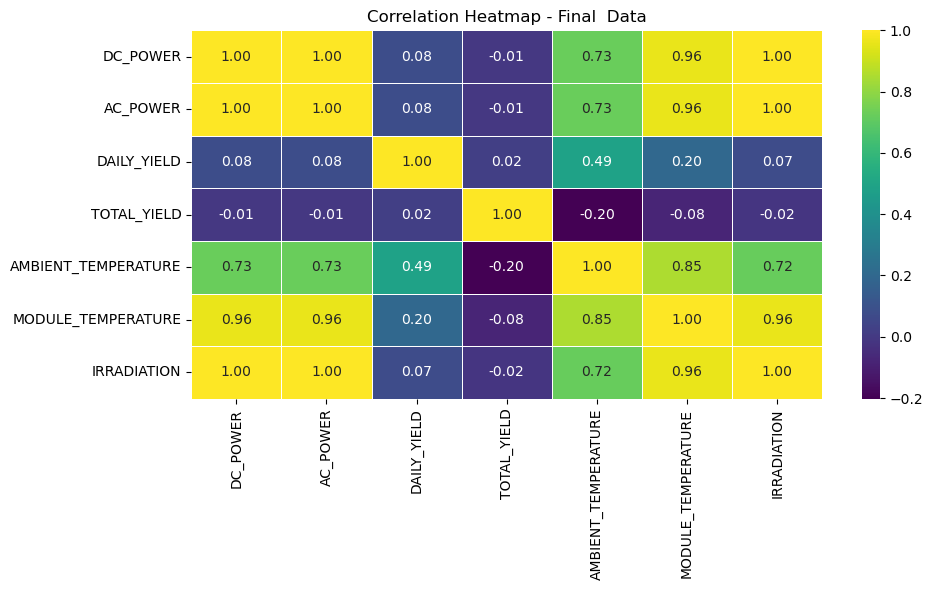

In [20]:
plt.figure(figsize=(10, 6)) # sets the figure size as 10 inches width and 6 inches tall
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5) 
plt.title("Correlation Heatmap - Final  Data")
plt.tight_layout() # used to prevent the overlapping in the figure area
plt.show() # used to visualize the figure


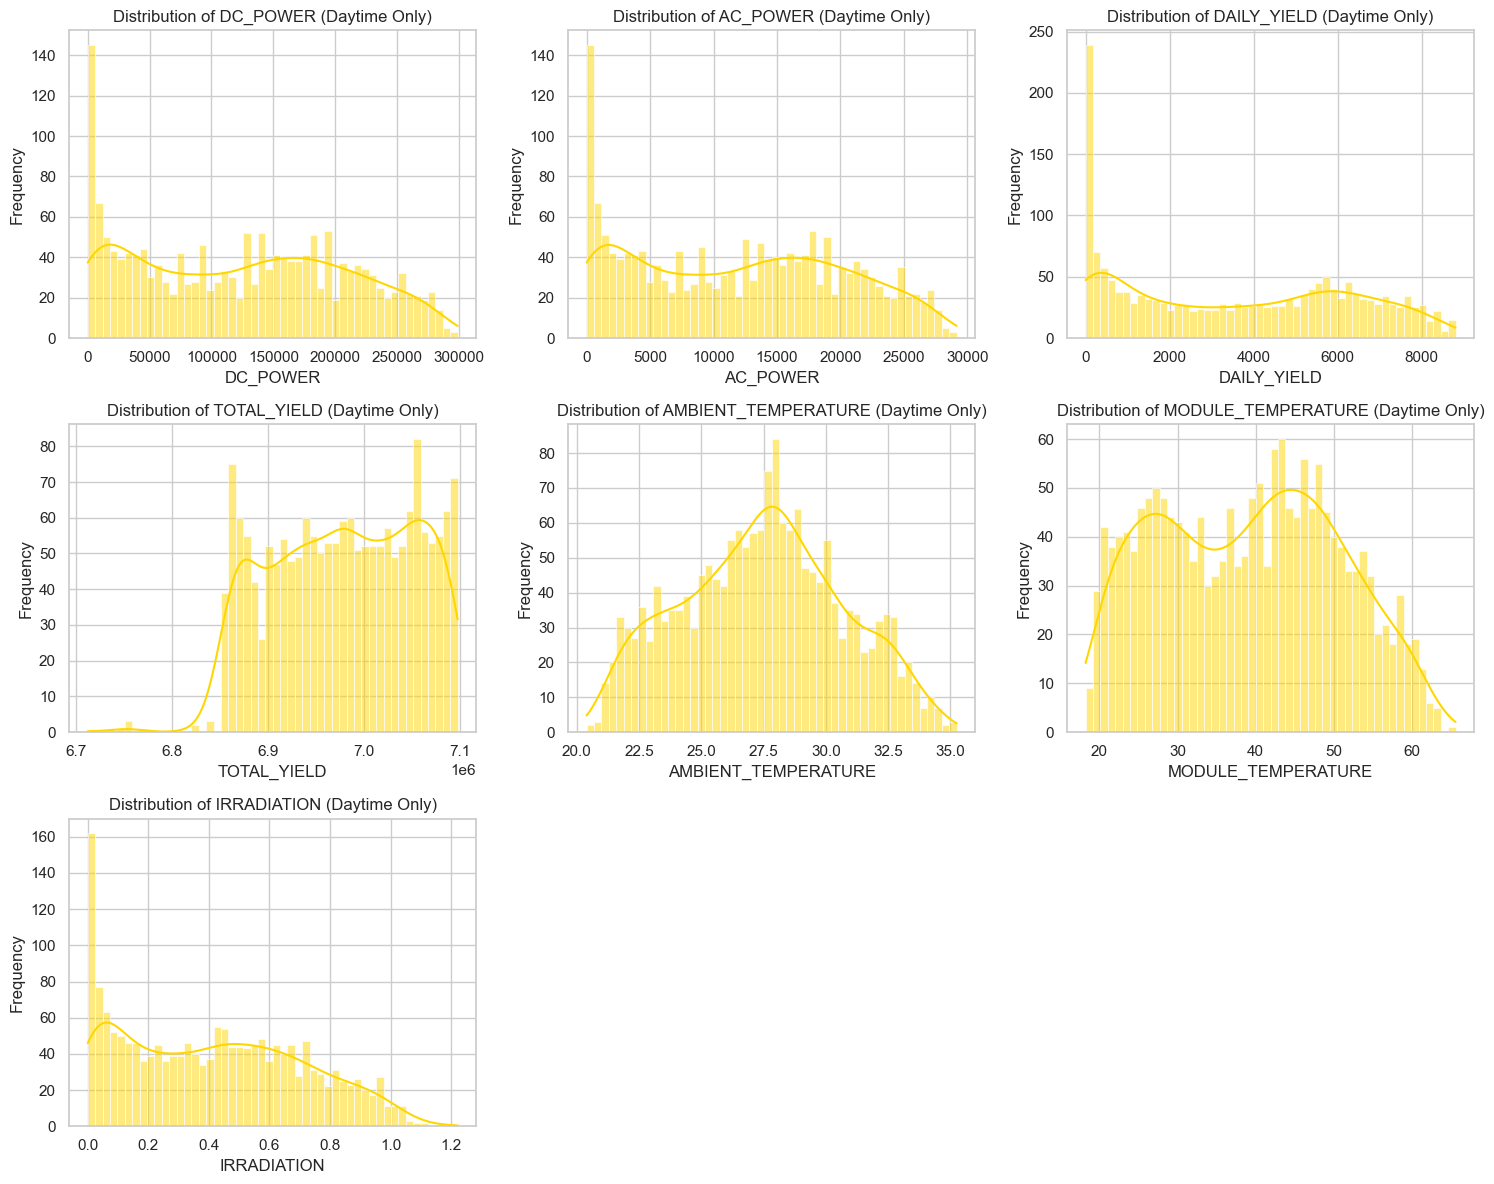

In [21]:
daytime_data = Final_Data[Final_Data['IRRADIATION']>0] # filtering only the day time data by setting Irridation > 0

numeric_columns = daytime_data.select_dtypes(include=['float64', 'int64']).columns # selecting only numeric columns from the dataframe

sns.set(style="whitegrid")

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(daytime_data[col], kde=True, bins=50, color='gold')
    plt.title(f'Distribution of {col} (Daytime Only)')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

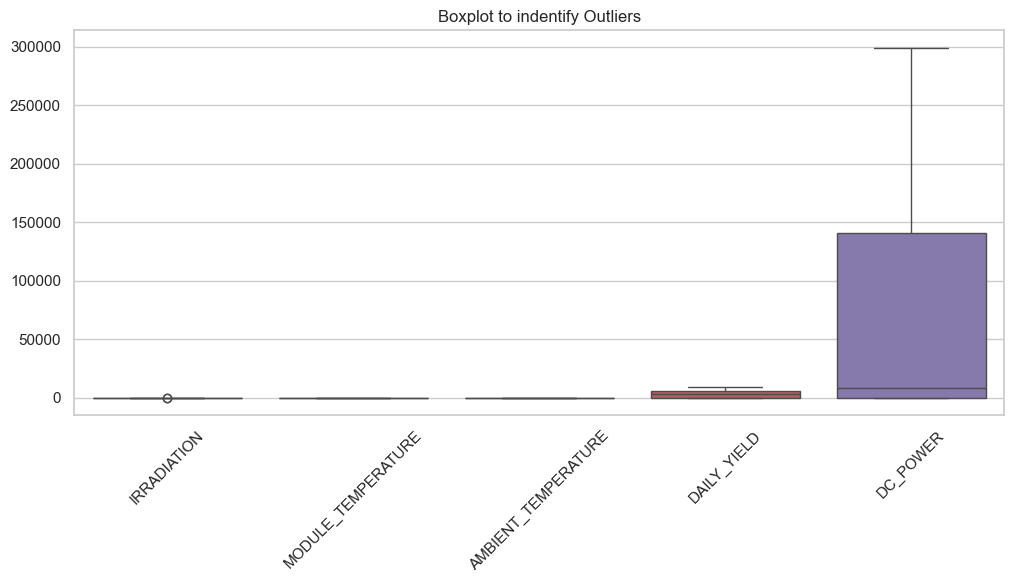

In [22]:
# Using these features to visualize the box plot to identify the outliers in a dataframe
Features = [
    'IRRADIATION',
    'MODULE_TEMPERATURE',
    'AMBIENT_TEMPERATURE',
    'DAILY_YIELD',
    'DC_POWER'
]
plt.figure(figsize=(12, 5))
sns.boxplot(data=Final_Data[Features])
plt.title("Boxplot to indentify Outliers")
plt.xticks(rotation=45)
plt.show()

In [23]:
# creating a copy to avoid the changes in original data
Data_Clean = Final_Data.copy()

In [24]:
#applying IQR method to remove the outliers
for col in Features:
    Q1 = Data_Clean[col].quantile(0.25)
    Q3 = Data_Clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    Data_Clean = Data_Clean[(Data_Clean[col] >= lower_bound) & (Data_Clean[col] <= upper_bound)]

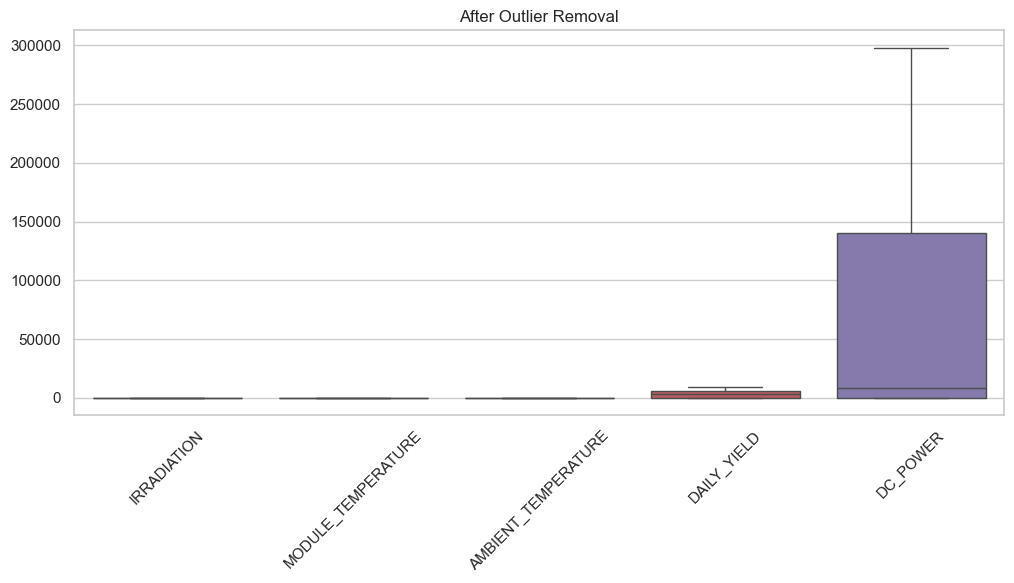

In [25]:
#Visualizing the box plot after removing the outliers
plt.figure(figsize=(12, 5))
sns.boxplot(data=Data_Clean[Features])
plt.title("After Outlier Removal")
plt.xticks(rotation=45)
plt.show()

In [26]:
Final_Data

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.0,0.0,0.000000,6.837223e+06,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,0.0,0.0,0.000000,6.837223e+06,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,0.0,0.0,0.000000,6.837223e+06,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,0.0,0.0,0.000000,6.837223e+06,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,0.0,0.0,0.000000,6.852802e+06,24.621525,22.165423,0.0
...,...,...,...,...,...,...,...,...
3152,2020-06-17 22:45:00,0.0,0.0,5889.590909,7.097398e+06,22.150570,21.480377,0.0
3153,2020-06-17 23:00:00,0.0,0.0,5889.590909,7.097398e+06,22.129816,21.389024,0.0
3154,2020-06-17 23:15:00,0.0,0.0,5889.590909,7.097398e+06,22.008275,20.709211,0.0
3155,2020-06-17 23:30:00,0.0,0.0,5889.590909,7.097398e+06,21.969495,20.734963,0.0


In [27]:
Data_Clean

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,0.0,0.0,0.000000,6.837223e+06,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,0.0,0.0,0.000000,6.837223e+06,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,0.0,0.0,0.000000,6.837223e+06,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,0.0,0.0,0.000000,6.837223e+06,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,0.0,0.0,0.000000,6.852802e+06,24.621525,22.165423,0.0
...,...,...,...,...,...,...,...,...
3152,2020-06-17 22:45:00,0.0,0.0,5889.590909,7.097398e+06,22.150570,21.480377,0.0
3153,2020-06-17 23:00:00,0.0,0.0,5889.590909,7.097398e+06,22.129816,21.389024,0.0
3154,2020-06-17 23:15:00,0.0,0.0,5889.590909,7.097398e+06,22.008275,20.709211,0.0
3155,2020-06-17 23:30:00,0.0,0.0,5889.590909,7.097398e+06,21.969495,20.734963,0.0


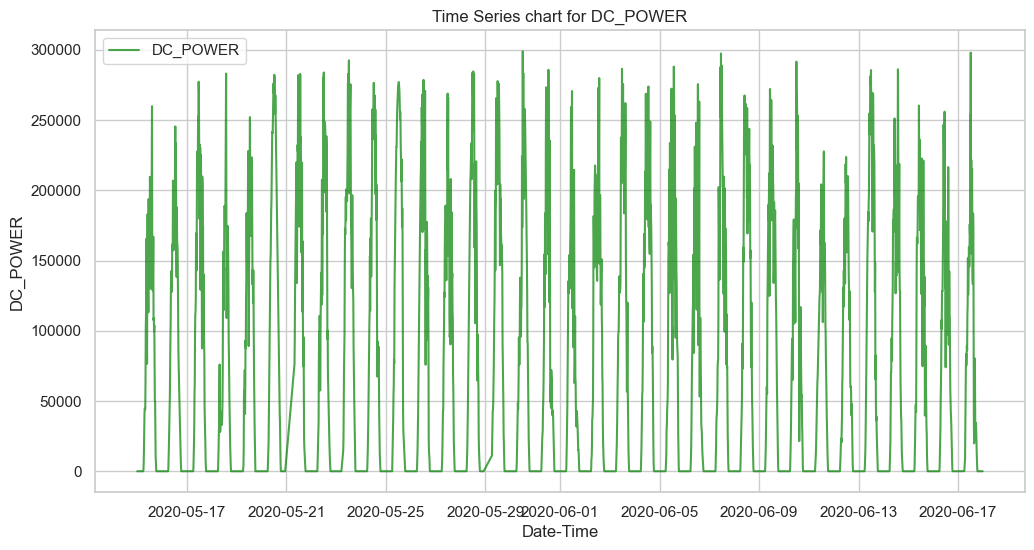

In [28]:
# Set DATE_TIME as the index
Final_Data.set_index('DATE_TIME', inplace=True)
Final_Data.sort_index(inplace=True)

# Plot DC_POWER time series
plt.figure(figsize=(12, 6))
plt.plot(Final_Data.index, Final_Data['DC_POWER'], color="green", alpha=0.7, label="DC_POWER")

plt.title("Time Series chart for DC_POWER")
plt.xlabel("Date-Time")
plt.ylabel("DC_POWER")
plt.legend()
plt.show()


In [29]:
features_to_scale = [
    'IRRADIATION',
    'MODULE_TEMPERATURE',
    'AMBIENT_TEMPERATURE',
    'DAILY_YIELD',
    'DC_POWER',
    'AC_POWER' 
]
scaler = StandardScaler()
Final_Data_standardized = Final_Data.copy()
Final_Data_standardized[features_to_scale] = scaler.fit_transform(Final_Data[features_to_scale])

print(Final_Data_standardized.head())

                     DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
DATE_TIME                                                            
2020-05-15 00:00:00  -0.77872 -0.779373    -1.091826  6.837223e+06   
2020-05-15 00:15:00  -0.77872 -0.779373    -1.091826  6.837223e+06   
2020-05-15 00:30:00  -0.77872 -0.779373    -1.091826  6.837223e+06   
2020-05-15 00:45:00  -0.77872 -0.779373    -1.091826  6.837223e+06   
2020-05-15 01:00:00  -0.77872 -0.779373    -1.091826  6.852802e+06   

                     AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
DATE_TIME                                                                  
2020-05-15 00:00:00            -0.112203           -0.677868    -0.763699  
2020-05-15 00:15:00            -0.141968           -0.685679    -0.763699  
2020-05-15 00:30:00            -0.186390           -0.699481    -0.763699  
2020-05-15 00:45:00            -0.213138           -0.718343    -0.763699  
2020-05-15 01:00:00            -0.280174           -0

In [30]:
features = ['IRRADIATION', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE'] # Input features or Independant Features
target = 'DC_POWER' # Target Varibale or Dependent Variable

X = Final_Data_standardized[features]
y = Final_Data_standardized[target]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Making predictions with the test data
y_pred = model.predict(X_test)
y_pred

array([-7.61336851e-01, -7.65015051e-01, -7.60749105e-01,  1.61004774e+00,
        1.18460786e+00, -7.58862676e-01,  3.53661026e-02, -7.64905416e-01,
       -7.54052793e-01, -7.63108933e-01,  2.15742763e+00, -7.35252966e-01,
       -7.63777815e-01, -7.66959544e-01, -7.63405458e-01, -7.65031696e-01,
        1.23122920e+00,  1.70765851e+00, -7.65288082e-01, -7.63013684e-01,
       -7.64245056e-01, -7.58254547e-01, -7.63202567e-01,  1.49294092e+00,
       -7.64273578e-01, -7.42817034e-01,  2.49015385e-01,  6.92637932e-01,
       -7.58119324e-01,  4.57971587e-01,  2.07663481e+00, -7.62742060e-01,
       -7.62484014e-01,  1.21851646e+00,  5.10716832e-01, -7.66405335e-01,
       -7.63271000e-01, -7.65367099e-01,  2.39760625e-01,  1.08704898e+00,
       -4.03614083e-02, -7.64300131e-01, -7.64011552e-01, -7.60948727e-01,
        2.01813664e+00,  1.75926046e+00,  1.54401009e+00, -7.64799872e-01,
        1.04527325e+00, -7.60920774e-01, -7.58197427e-01, -7.64143983e-01,
       -3.22100648e-01,  

In [34]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)

MSE: 0.005833394422820256
R² Score: 0.9939010484149995


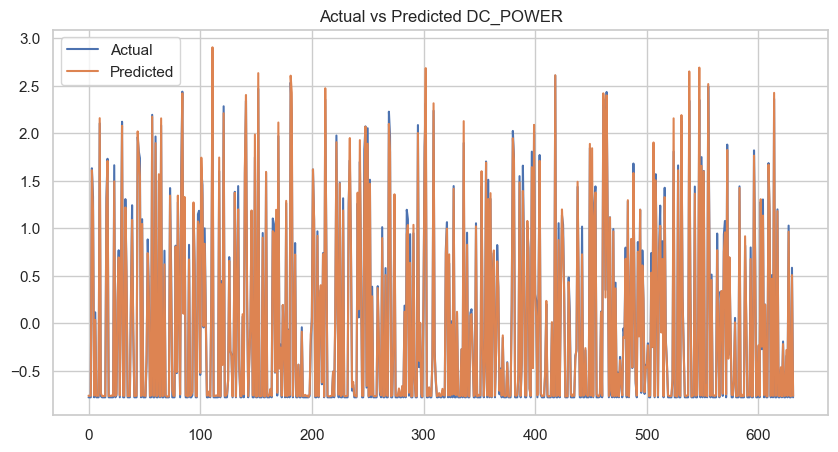

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted DC_POWER")
plt.legend()
plt.show()

In [37]:

# features used in model training
features = ['IRRADIATION', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE']

# user input
user_input = []
print("Enter values for the following features:")

for feature in features:
    value = float(input(f"{feature}: "))
    user_input.append(value)

# Reshape to match scaler input
input_array = np.array(user_input).reshape(1, -1)

# Scale using a new scaler trained only on those 3 features
scaler = StandardScaler().fit(X_train)  
scaled_input = scaler.transform(input_array)

# Predict
predicted_power = model.predict(scaled_input)

print(f"\n⚡ Predicted DC Power: {predicted_power[0]:.4f}")

Enter values for the following features:


IRRADIATION:  800
MODULE_TEMPERATURE:  45
AMBIENT_TEMPERATURE:  32



⚡ Predicted DC Power: 753.0851


C:\Users\Shivani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Shivani\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
joblib.dump(model, 'solar_Power_eneration_model.pkl')

['solar_Power_eneration_model.pkl']

In [39]:
print(Final_Data.index)

DatetimeIndex(['2020-05-15 00:00:00', '2020-05-15 00:15:00',
               '2020-05-15 00:30:00', '2020-05-15 00:45:00',
               '2020-05-15 01:00:00', '2020-05-15 01:15:00',
               '2020-05-15 01:30:00', '2020-05-15 01:45:00',
               '2020-05-15 02:00:00', '2020-05-15 02:15:00',
               ...
               '2020-06-17 21:30:00', '2020-06-17 21:45:00',
               '2020-06-17 22:00:00', '2020-06-17 22:15:00',
               '2020-06-17 22:30:00', '2020-06-17 22:45:00',
               '2020-06-17 23:00:00', '2020-06-17 23:15:00',
               '2020-06-17 23:30:00', '2020-06-17 23:45:00'],
              dtype='datetime64[ns]', name='DATE_TIME', length=3157, freq=None)


In [40]:
Final_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3157 entries, 2020-05-15 00:00:00 to 2020-06-17 23:45:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DC_POWER             3157 non-null   float64
 1   AC_POWER             3157 non-null   float64
 2   DAILY_YIELD          3157 non-null   float64
 3   TOTAL_YIELD          3157 non-null   float64
 4   AMBIENT_TEMPERATURE  3157 non-null   float64
 5   MODULE_TEMPERATURE   3157 non-null   float64
 6   IRRADIATION          3157 non-null   float64
dtypes: float64(7)
memory usage: 197.3 KB


In [41]:
Final_Data.reset_index(inplace=True)

In [42]:
### Extracting the important features to predict the power generation based on time
Final_Data['HOUR'] = Final_Data['DATE_TIME'].dt.hour
Final_Data['DAY'] = Final_Data['DATE_TIME'].dt.day
Final_Data['MONTH'] = Final_Data['DATE_TIME'].dt.month
Final_Data['DAY_OF_WEEK'] = Final_Data['DATE_TIME'].dt.dayofweek

In [43]:
features = [
    'IRRADIATION',
    'MODULE_TEMPERATURE',
    'AMBIENT_TEMPERATURE',
    'HOUR',
    'DAY',
    'MONTH',
    'DAY_OF_WEEK'
]
target = 'DC_POWER'

X = Final_Data[features]
y = Final_Data[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [45]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
y_pred = model.predict(X_test)
y_pred

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.13332788e+05,
       1.69880984e+05, 0.00000000e+00, 7.71939477e+04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.52652334e+05, 9.95817560e+02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.86723619e+05, 2.19309303e+05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.01060830e+05,
       0.00000000e+00, 1.66500561e+03, 9.18244722e+04, 1.38743365e+05,
       0.00000000e+00, 1.15697663e+05, 2.50688628e+05, 0.00000000e+00,
       0.00000000e+00, 1.88418179e+05, 1.15626946e+05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.83311027e+04, 1.78103902e+05,
       7.03559132e+04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.41029740e+05, 2.24590369e+05, 1.96235361e+05, 0.00000000e+00,
       1.65751928e+05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.04114054e+04, 1.42469969e+05, 9.43922834e+04, 0.00000000e+00,
      

In [47]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)

MSE: 29287036.418764036
R² Score: 0.9960496962143623


In [49]:
#getting the input from the user
date_str = input("Enter date and time (YYYY-MM-DD HH:MM): ")
IRRADIATION = float(input("Enter IRRADIATION: "))
MODULE_TEMPERATURE = float(input("Enter MODULE TEMPERATURE (°C): "))
AMBIENT_TEMPERATURE = float(input("Enter AMBIENT TEMPERATURE (°C): "))

#parsing Date time and Extracting the input features
input_time = datetime.strptime(date_str, "%Y-%m-%d %H:%M")
hour = input_time.hour
day = input_time.day
month = input_time.month
day_of_week = input_time.weekday() 

#creating Input Data Frame
input_df = pd.DataFrame([[ IRRADIATION, MODULE_TEMPERATURE, AMBIENT_TEMPERATURE, hour, day, month, day_of_week]],
            columns=['IRRADIATION','MODULE_TEMPERATURE','AMBIENT_TEMPERATURE','HOUR','DAY','MONTH','DAY_OF_WEEK'])

#Scaling the user input
input_scaled = scaler.transform(input_df)

#making prediction with trained model
predicted_dc_power = model.predict(input_scaled)

#printing the predicted result
print(f"\n⚡ Predicted DC Power: {predicted_dc_power[0]:.4f}")

Enter date and time (YYYY-MM-DD HH:MM):  2025-08-07 14:30
Enter IRRADIATION:  800
Enter MODULE TEMPERATURE (°C):  45
Enter AMBIENT TEMPERATURE (°C):  32



⚡ Predicted DC Power: 274128.6157


In [50]:
joblib.dump(model, 'solar_Power_Generation_Forecasting_model.pkl')

['solar_Power_Generation_Forecasting_model.pkl']

In [51]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']